# Day 6 Spectral Methods 

In [1]:
using PyPlot
using Distributions
using Random
Random.seed!(1234);

6.1 Bayesian estimation of autoregression parameters  
6.2 Power spectrum        
6.3 Summary and additional questions    

## 6.0 Recap of Day 5

**5.1 Curve-fitting**  
Linear fit  
Polynomial fit

**5.2 Stochastic time-series models**  
Autoregressive model  
Mean, variance and autocovariance  

## 6.1 Bayesian Estimation for an Auto-Regression Model

6.1.1 Distribution for the next step.  
6.1.2 Log-likelihood for a path.  

### 6.1.1 Distribution for the Next Step  

Consider the auto-regression model.  

$$ X_k=c+\phi X_{k-1}+\epsilon_k $$

where the noise has a mean zero and variance $\sigma_\epsilon$.

**<font color='red'>Question:</font>**   
*  What is the distribution for $\epsilon_k$?  


* What then is the distribution for $X_k$ given $X_{k-1}$?


* Imagine the intial value is $X_1$. What is the likelihood for the chain of points $X_1,X_2,X_3$?

**<font color='green'>Answer:</font>**   
*  What is the distribution for $\epsilon_k$?  $\epsilon_k \sim \mathcal{N}(0, \sigma_\epsilon^2)$.

$$ f(\epsilon)=e^{-\epsilon^2/2\sigma^2_\epsilon}/\sqrt{2\pi\sigma_\epsilon^2}$$


* What then is the distribution for $X_k$ given $X_{k-1}$?

$$ f(X_k|X_{k-1})=\exp\left(-(X_k-c-\phi X_{k-1})^2/2\sigma^2_\epsilon\right)/\sqrt{2\pi\sigma_\epsilon^2}$$



* Imagine the intial value is $X_1$. What is the likelihood for the chain of points $X_1,X_2,X_3,X_4$?

$${\cal L }(\{X_1,X_2,X_3,X_4\}|c,\phi,\sigma_\epsilon)=f(X_4|X_{3})f(X_3|X_{2})f(X_2|X_{1})$$


**NOTE**
* Often numerically better to sum the log likelihoods and then exponentiate at the end.  

### 6.1.2 <font color='red'>Question:</font> Bayesian Parameter Inference for a Path

Consider auto-regressive model of the form  

$$x_k=ax_{k-1}+bs_k$$

where $-1<a<1$ and $0<b<2$ (for this question). The noise terms $\{s_k\}$ are independent Gaussian random numbers with zero mean and unit variance.  


*  Choose a value of $a$ and $b$ within the range and generate $N$ data points from $x_1$ to $x_{N}$ where you can assume $x_1=b s_1$ for the initial case. $N$ in the range $20\to30$ is reasonable for this question.  


*  By considering the probability density for $x_k$ given $x_{k-1}$, write an algorithm that calculates the total log likelihood for the $N$ data points conditional on $a$ and $b$ over the range given above. This will involve a sum over the individual log likelhoods for each step. At the end you can exponentiate this to get the total likelihood.  


* Plot the density on the $a$-$b$ plane and plot out the marginals.   

### 6.1.2 <font color='green'>Answer:</font> Bayesian Parameter Inference for a Path 

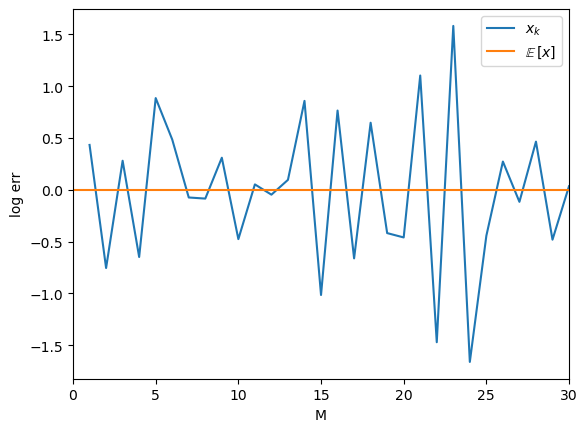

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [2]:
# set a = -0.7, b = 0.5
a, b = -0.7, 0.5

# set N = 30
N = 30
xs = zeros(N)

# initialize x₁ in xs
xs[1] = b * randn()

# set other values in xs
for k in 2: length(xs)
    xs[k] = a * xs[k-1] + b * randn()
end 

#plt.plot(1:N, xs)
plt.plot(1:N, xs, label=L"$x_k$")
plt.plot(0:N, zeros(N+1), label=L"$\mathbb{E}\,[x]$")
#plt.plot(0:N, zeros(N+1))
plt.legend()
plt.xlim(0, N)
plt.xlabel("M")
plt.ylabel("log err")
plt.show();

Given $X_{k-1}$, the probability density function of $X_k$ is 
$$
f(X_k|X_{k-1})=\exp\left(-(X_k-c-\phi X_{k-1})^2/2\sigma^2_\epsilon\right)/\sqrt{2\pi\sigma_\epsilon^2}.
$$

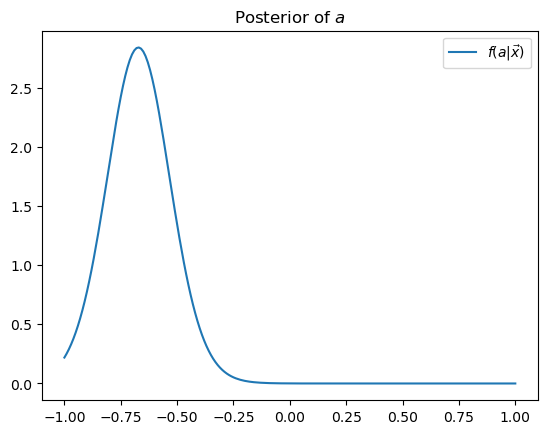

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [3]:
da = 0.01
db = 0.01
as = -1: da: 1
bs = 0.01: db: 2.01


posterior = zeros(length(as), length(bs))
prior = ones(length(as), length(bs)) / (da*db)
log_likelihood = zeros(length(as), length(bs))
likelihood = zeros(length(as), length(bs))
for i in 1: length(as)
    a = as[i]
    for j in 1: length(bs)
        b = bs[j]
        for k in 2: length(xs)
            log_likelihood[i,j] = log_likelihood[i,j] + logpdf(Normal(a*xs[k-1], b), xs[k])
        end
        likelihood[i,j] = exp(log_likelihood[i,j])
        posterior[i,j] = likelihood[i,j] * prior[i,j]
    end
end
posterior = posterior / (sum(sum(posterior)) * da * db)

posterior_a = sum(posterior, dims=2) * db
plt.plot(as, posterior_a, label=L"$f(a|\vec{x})$")
plt.legend()
plt.title(L"Posterior of $a$")
plt.show();

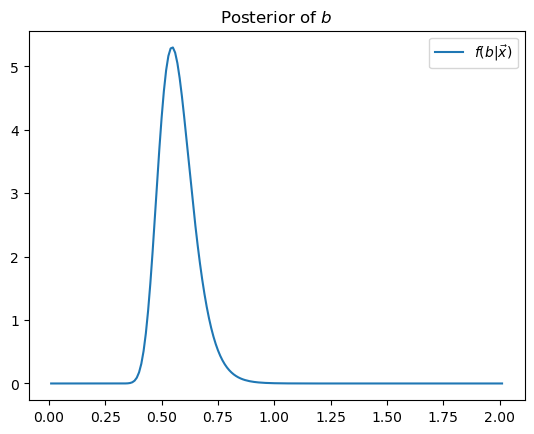

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [4]:
posterior_b = transpose(sum(posterior, dims=1)) * da
plt.plot(bs, posterior_b, label=L"$f(b|\vec{x})$")
plt.legend()
plt.title(L"Posterior of $b$")
plt.show();

In [5]:
function MyLogLikelihood(x1,x2,A,B)
    
    nA,nB=length(A),length(B)
    L=zeros(nA,nB)
    for k=1:nA
        for j=1:nB
            L[k,j]=-(x2-x1*A[k])^2/(2*B[j]^2) - (1/2)*log(2*pi*B[j]^2)
        end
    end
    
    return L
end

MyLogLikelihood (generic function with 1 method)

Below is Magus' code.

In [6]:
# consider a process with
# x_t=a*x_{t-1}+bs_t (where s_t is zero mean unit variance)

a,b=-0.7,0.5;

# generate some data
N=30; x=zeros(N)
x[1]=b*randn()
for k=1:N-1
    x[k+1]=a*x[k]+b*randn()
end
s=collect(1:N);


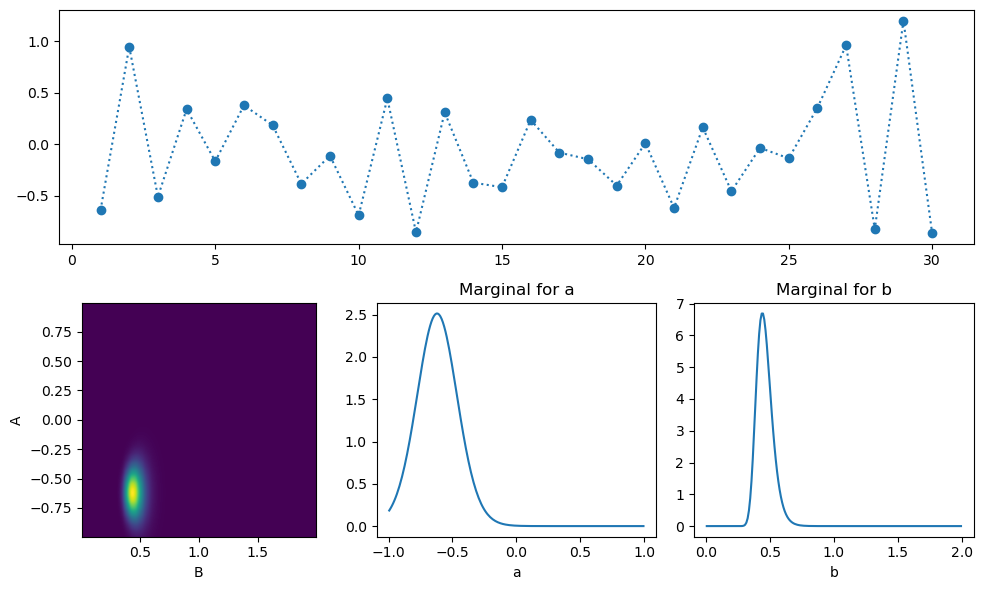

sum(dA * dB * exp.(L)) = 1.5059296005968692e-9


In [7]:
# set up the grid
dA=0.01; A=collect(-1+dA/2:dA:1-dA/2); nA=length(A)
dB=0.01; B=collect(dB/2:dB:2-dB/2); nB=length(B)

L=MyLogLikelihood(0,x[1],A,B);
for j=1:N-1
    L=L+MyLogLikelihood(x[j],x[j+1],A,B);
end

@show sum(dA*dB*exp.(L))
QQ=exp.(L)/sum(dA*dB*exp.(L));

# get the marginals
QA=sum(QQ*dB,dims=2);
QB=sum(QQ*dA,dims=1)';

figure(figsize=(10,6))
subplot(211); plot(s,x,"o:");
subplot(234)
imshow(QQ,origin="lower",extent=[B[1],B[end],A[1],A[end]])
ylabel("A"); xlabel("B");
subplot(235); plot(A,QA); xlabel("a"); title("Marginal for a")
subplot(236); plot(B,QB); xlabel("b"); title("Marginal for b")
tight_layout()

## 6.2 Power spectrum 

6.2.1 Ornstein-Uhlenbeck process   
6.2.2 O-U variance and cross-correlation  
6.2.3 Power spectrum and Wiener-Khinchin theorem  

### 6.2.1 Ornstein-Uhlenbeck model$\newcommand{\Ex}[1]{\langle #1 \rangle}$

* The autoregressive model is discrete in time.

$\hspace{0.8cm}$ $X_k=c+\phi X_{k-1}+\epsilon_k~~$ where $~~\Ex{\epsilon}=0~$ and $~\Ex{\epsilon^2}=\sigma_\epsilon^2$.

* Does a continuum limit exist? Assume time-step $\Delta_t$ so $t=\Delta_t k$.  
Meaning shorter time steps tend to some limit independent of $\Delta_t$  



**<font color='red'>Question:</font>** 
* Let $\phi=1-\Delta_t/\tau$ where $\tau$ is a time constant.
* And call $\Ex{X}=\mu$ and Var$(X)=\sigma^2$, neither of which are   
dependent on $\Delta_t$ to leading order. To satisfy this restriction...


* Show that $c=\mu\Delta_t/\tau$ 

* Show that $\sigma_\epsilon^2=\sigma^22\Delta_t/\tau$ to leading order in $\Delta_t$.

* And finally show that in the continuum limit 

$\hspace{0.8cm} \tau\frac{dX}{dt}=\mu-X+\sigma\sqrt{2\tau}\xi(t)$  


$\hspace{0.8cm}$where $\Ex{\xi(t)}=0$ and $\Ex{\xi(t)\xi(t')}=\delta(t-t')$.


* The autoregressive model is discrete in time.

$\hspace{0.8cm}$ $X_k=c+\phi X_{k-1}+\epsilon_k~~$ where $~~\Ex{\epsilon}=0~$ and $~\Ex{\epsilon^2}=\sigma_\epsilon^2$.


**<font color='green'>Answer:</font>** 

* Restrictions on $c$ and $\sigma_\epsilon$ from mean and variance independent of $\Delta_t$.

$\hspace{0.8cm}$ $\phi=1-\Delta_t/\tau~$, $~c=\mu\Delta_t/\tau~$ and $~\sigma_\epsilon^2=\sigma^22\Delta_t/\tau$ 

* Substitute into the autoregressive model

$$ X_k=\mu\frac{\Delta_t}{\tau}+\left(1-\frac{\Delta_t}{\tau}\right) X_{k-1}+\Delta_t\sigma\sqrt{2/\tau}\xi_k~$$

$$ X_k - X_{k-1} = \mu\frac{\Delta_t}{\tau} -\frac{\Delta_t}{\tau} X_{k-1}+\Delta_t\sigma\sqrt{2/\tau}\xi_k~$$

$$ X_k - X_{k-1} = \mu\frac{\Delta_t}{\tau} -\frac{\Delta_t}{\tau} X(t)+\Delta_t\sigma\sqrt{2/\tau}\xi_k~$$

$$ \frac{X_k - X_{k-1}}{\Delta_t} = \mu\frac{1}{\tau} -\frac{1}{\tau} X(t)+\sigma\sqrt{2/\tau}\xi_k~$$

* where $\xi_k=\frac{\psi_k}{\Delta_t^{1/2}}$ with $\psi_k$ a zero mean unit variance Gaussian for step $k$.


* Taking the continuum limit and writing $\xi_k=\xi(t)$ results in the Ornstein-Uhlenbeck equation.


* Note that $\Ex{\xi_k\xi_j}=1/\Delta_t$ giving the Dirac delta function rule.


* The process $\xi(t)$ is called Gaussian-white noise.


### 6.2.2 O-U Variance 


* Differential equation 


$\hspace{0.8cm} \tau\frac{dX}{dt}=\mu-X+\sigma\sqrt{2\tau}\xi(t)$  


* Straightforward to solve 


$\hspace{0.8cm} X(t)=\mu+\sigma\sqrt{2\tau}\int_{-\infty}^t\frac{ds}{\tau}e^{-(t-s)/\tau}\xi(s)$


* Mean straightforward. Check the variance...

$\hspace{0.8cm} \Ex{(X(t)-\mu)^2}=\sigma^22\tau\int_{-\infty}^t\frac{ds}{\tau}\int_{-\infty}^t\frac{ds'}{\tau}e^{-(t-s)/\tau}e^{-(t'-s')/\tau}\Ex{\xi(s)\xi(s')}$


* Use the correlator for white noise $\Ex{\xi(t)\xi(t')}=\delta(t-t')$ to give

$\hspace{0.8cm} \Ex{(X(t)-\mu)^2}=\sigma^22\int_{-\infty}^t\frac{ds}{\tau}e^{-2(t-s)/\tau}=\sigma^2$


* What about the autocovariance?

* The solution to the O-U model

$\hspace{0.8cm} \tau\frac{dX}{dt}=\mu-X+\sigma\sqrt{2\tau}\xi(t)~~$ is $~~
 X(t)=\mu+\sigma\sqrt{2\tau}\int_{-\infty}^t\frac{ds}{\tau}e^{-(t-s)/\tau}\xi(s)$

* So the covariance can be written as follows (using $x=X-\mu$).

$\hspace{0.8cm} \Ex{x(t)x(t+T)}=\sigma^22\tau\int_{-\infty}^t\frac{ds}{\tau}\int_{-\infty}^{t+T}\frac{ds'}{\tau}e^{-(t-s)/\tau}e^{-(t+T-s')/\tau}\Ex{\xi(s)\xi(s')}$


* The calculation is similar to the autoregression model.
* Assume $T\geq0$, because the $T<0$ follows by symmetry.  
* Non-zero part of integral runs up to $T$ only, leaving...

$\hspace{0.8cm} \Ex{x(t)x(t+T)}=e^{-T/\tau}\sigma^22\tau\int_{-\infty}^t\frac{ds}{\tau}\int_{-\infty}^{t}\frac{ds'}{\tau}e^{-(t-s)/\tau}e^{-(t-s')/\tau}\Ex{\xi(s)\xi(s')}$


* So that the autocovariance becomes  

$\hspace{0.8cm} \Ex{x(t)x(t+T)}=\sigma^2e^{-|T|/\tau}$.

### 6.2.3 Power Spectrum and Wiener-Khinchin Theorem$\newcommand{\w}{\omega}$

* Consider the Fourier transform of a zero-mean signal over a finite range.  

$\hspace{0.8cm} \hat{x}_T(\w)=\frac{1}{\sqrt{T}}\int_{-T/2}^{T/2}dt~x(t)e^{-i\w t}$


* Power spectrum (expectation of squared amplitude) $S(\w)=\Ex{|\hat{x}_T(\w)|^2}$ so


$\hspace{0.8cm} S(\w)=\frac{1}{T}\int_{-T/2}^{T/2}\int_{-T/2}^{T/2}dtdt'~e^{-i\w(t-t')}\Ex{x(t)x(t')}$


* But $\Ex{x(t)x(t')}=A(t-t')$ is just the autocovariance  


* Introduce $r=(t+t')/2$ and $t''=t-t'$.     
* Consider the region of integration for large $T$. 
* If $A(T)\to0$ for large $T$ then a good approximation is

$\hspace{0.8cm} S(\w)=\frac{1}{T}\int_{-T/2}^{T/2}dr\int_{-\infty}^{\infty}dt''~e^{-i\w t''}A(t'')=\hat{A}(\w)$

* The power-spectrum is the Fourier transform of the autocovariance.  
* This is the Wiener-Khinchin theorem.


## 6.3 Summary and Additional Questions

### Day 6 Basic Time-Series Analysis

6.1 Bayesian estimation for an auto-regression model  
6.2 Power spectrum       
6.3 Summary and additional questions    

### Questions

Make sure you have understood and done all the questions in the lectures.

The questions below are to be emailed in for marking by 12noon Thursday 3rd December 2020. 

**Q6.3.1** Power spectrum for the Ornstein-Uhlenbeck process.  
**Q6.3.2** Correlated Ornstein-Uhlenbeck processes.  

#### <font color='red'>Q6.3.1</font> Power-Spectrum for the O-U Process

* Consider the Ornstein-Uhlenbeck process described in the lecture notes.   
Use it's autocovariance to provide the form of the power spectrum $S(\w)$.  

#### <font color='red'>Q6.3.2</font> Correlated O-U Processes

* Consider two O-U processes driven by the same Gaussian white noise $\xi(t)$  
But with two different time constants $\tau_x$ and $\tau_y$ so that

$\hspace{0.8cm} \tau_x\frac{dx}{dt}=-x+\sigma\sqrt{2\tau_x}\xi(t)~$ and $\tau_y\frac{dy}{dt}=-y+\sigma\sqrt{2\tau_y}\xi(t)~$


* What is the same-time correlation $\Ex{x(t)y(t)}$?


* Calculate the cross-covariance $\Ex{x(t)y(t+T)}$ and be sure to   
provide the forms for both positive and negative $T$.